In [1]:
import cx_Oracle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
conn = cx_Oracle.connect('js_dev', '123456', 'wind')
# conn = cx_Oracle.connect('fe_res', 'fe_res123', 'IACORE')

In [18]:
query = 'select t.S_INFO_WINDCODE from wind.CBondDescription t\
         where t.CRNCY_CODE=\'USD\' '

In [19]:
df = pd.read_sql(query, con=conn)

In [58]:
df['TRADE_DT'] = pd.to_datetime(df['TRADE_DT'], format='%Y%m%d')

In [59]:
df.shape

(13719723, 3)

In [60]:
df.head()

,S_INFO_WINDCODE,TRADE_DT,S_VAL_MV
0,000016.SZ,1992-12-23,227745.1600
1,000002.SZ,1992-12-23,305726.8624
2,600621.SH,1992-12-23,61803.5160
3,600652.SH,1992-12-23,9585.0000
4,600611.SH,1992-12-23,129451.3000


In [68]:
df = df.set_index(['TRADE_DT', 'S_INFO_WINDCODE']).unstack()

In [71]:
mask = df.rank(axis=1, ascending=False)

In [72]:
n_series = df.shape[1] - df.isnull().sum(axis=1)

In [75]:
cap = pd.Series(index=n_series.index)
for date in n_series.index:
    s = mask.loc[date]
    select = mask.loc[date] < (n_series.loc[date]/10)
    cap.loc[date] = (df.loc[date] * select).sum()

In [85]:
cap = cap.replace([0.0], np.NAN)

In [86]:
ratio = cap / df.sum(axis=1)

In [87]:
ind_df = pd.read_excel('D:/data/index/881001.WI.xlsx')

In [96]:
# rank_ratio = ratio.rolling(1500).apply(lambda x: pd.Series(x).rank(pct=True).iloc[-1])

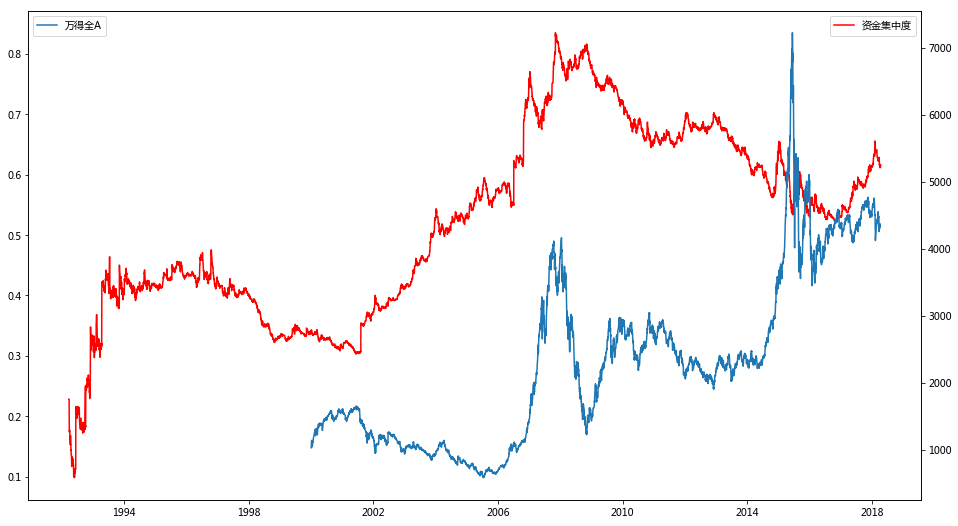

In [97]:
fig, ax1 = plt.subplots(figsize=(16, 9))
ax1.plot(ratio, color='red', label=u'资金集中度')
ax1.legend()
ax2 = ax1.twinx()
ax2.plot(ind_df['close'], label=u'万得全A')
ax2.legend(loc='upper left')

In [83]:
cap[cap.index >= '2015-01-20']

TRADE_DT
2015-01-20    2.711164e+09
2015-01-21    2.856614e+09
2015-01-22    2.862845e+09
2015-01-23    2.876502e+09
2015-01-24    0.000000e+00
2015-01-25    0.000000e+00
2015-01-26    2.906874e+09
2015-01-27    2.868169e+09
2015-01-28    2.819847e+09
2015-01-29    2.781403e+09
2015-01-30    2.736396e+09
2015-01-31    2.736396e+09
2015-02-01    2.736396e+09
2015-02-02    2.653413e+09
2015-02-03    2.728176e+09
2015-02-04    2.698079e+09
2015-02-05    2.665779e+09
2015-02-06    2.613610e+09
2015-02-07    2.613610e+09
2015-02-08    2.613610e+09
2015-02-09    2.639329e+09
2015-02-10    2.685243e+09
2015-02-11    2.698298e+09
2015-02-12    2.708002e+09
2015-02-13    2.732287e+09
2015-02-14    2.732288e+09
2015-02-15    2.732288e+09
2015-02-16    2.743044e+09
2015-02-17    2.774637e+09
2015-02-18    2.774866e+09
                  ...     
2018-03-12    4.026396e+09
2018-03-13    4.003864e+09
2018-03-14    3.981160e+09
2018-03-15    3.991276e+09
2018-03-16    3.952466e+09
2018-03-17    3.952

In [131]:
query = 'select t.trade_dt, t.s_dq_close \
         from wind.AIndexEODPrices t \
         where t.s_info_windcode=\'000001.SH\''

In [132]:
df = pd.read_sql(query, con=conn)

In [133]:
df

,TRADE_DT,S_DQ_CLOSE
0,19901219,99.9800
1,19901220,104.3900
2,19901221,109.1300
3,19901224,114.5500
4,19901225,120.2500
5,19901226,125.2700
6,19901227,125.2800
7,19901228,126.4500
8,19901231,127.6100
9,19910102,128.8400
